In [1]:
import numpy as np
import pandas as pd

from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
df_ms = pd.read_csv("../../data/qst_mle_dataset_mixed_states.csv")
N_SHOTS_ms = 100  # For each X, Y, Z basis
TOTAL_SHOTS_ms = 300

df_ms = df_ms[df_ms["r_ideal"] >= 0.001]
df_ms.head()

,X_mean,Y_mean,Z_mean,theta_ideal,phi_ideal,r_ideal,cos_phi_ideal,sin_phi_ideal,cos_theta_ideal,sin_theta_ideal,X_ideal,Y_ideal,Z_ideal
0,0.00,-0.92,-0.28,1.824427,4.599254,0.950714,-0.112894,-0.993607,-0.250920,0.968008,-0.103896,-0.914415,-0.238553
1,0.72,-0.18,0.18,1.292352,6.131459,0.726091,0.988512,-0.151144,0.274860,0.961484,0.690105,-0.105518,0.199573
2,-0.12,-0.18,-0.08,2.198555,3.163064,0.364270,-0.999769,-0.021470,-0.587333,0.809346,-0.294752,-0.006330,-0.213948
3,-0.10,0.40,-0.30,1.813796,1.684294,0.590295,-0.113254,0.993566,-0.240615,0.970621,-0.064889,0.569266,-0.142034
4,-0.16,-0.54,-0.58,2.308719,4.358534,0.794810,-0.346517,-0.938044,-0.672752,0.739868,-0.203770,-0.551620,-0.534710


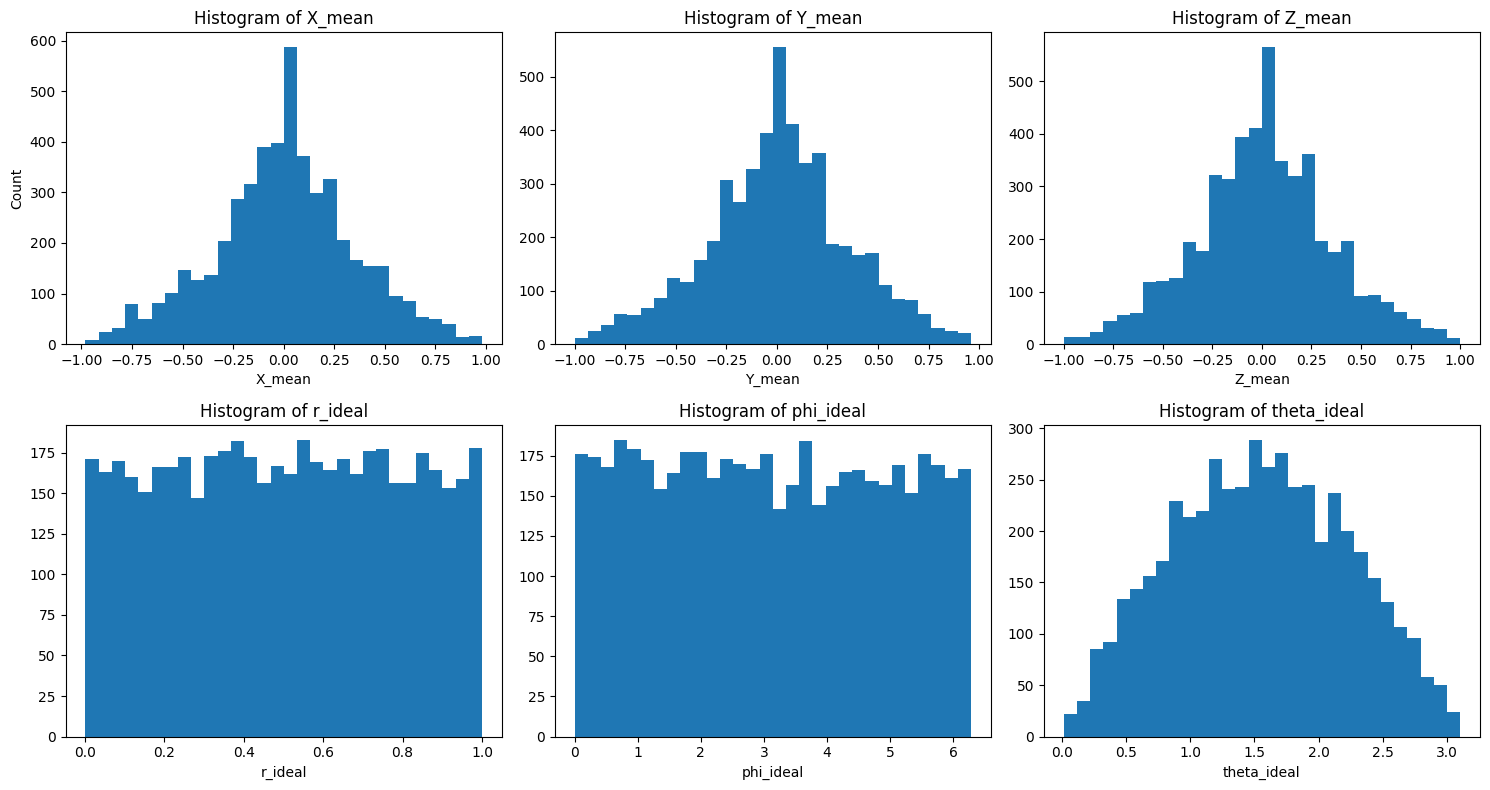

In [3]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

axes[0,0].hist(df_ms["X_mean"], bins=30)
axes[0,0].set_title("Histogram of X_mean")
axes[0,0].set_xlabel("X_mean")
axes[0,0].set_ylabel("Count")

axes[0,1].hist(df_ms["Y_mean"], bins=30)
axes[0,1].set_title("Histogram of Y_mean")
axes[0,1].set_xlabel("Y_mean")

axes[0,2].hist(df_ms["Z_mean"], bins=30)
axes[0,2].set_title("Histogram of Z_mean")
axes[0,2].set_xlabel("Z_mean")

axes[1,0].hist(df_ms["r_ideal"], bins=30)
axes[1,0].set_title("Histogram of r_ideal")
axes[1,0].set_xlabel("r_ideal")

axes[1,1].hist(df_ms["phi_ideal"], bins=30)
axes[1,1].set_title("Histogram of phi_ideal")
axes[1,1].set_xlabel("phi_ideal")

axes[1,2].hist(df_ms["theta_ideal"], bins=30)
axes[1,2].set_title("Histogram of theta_ideal")
axes[1,2].set_xlabel("theta_ideal")

plt.tight_layout()
plt.show()

In [4]:
# Compute probabilities based on the mean
df_ms["probaX+"] = (1 + df_ms["X_mean"]) / 2.0
df_ms["probaY+"] = (1 + df_ms["Y_mean"]) / 2.0
df_ms["probaZ+"] = (1 + df_ms["Z_mean"]) / 2.0

# Compute number of occurence of each state
# ! We take N_SHOTS = 100 as established before (dataset creation)
df_ms["numberX"] = (df_ms["probaX+"] * N_SHOTS_ms).round().astype(int)
df_ms["numberY"] = (df_ms["probaY+"] * N_SHOTS_ms).round().astype(int)
df_ms["numberZ"] = (df_ms["probaZ+"] * N_SHOTS_ms).round().astype(int)

df_ms["rx"] = 2 * df_ms["probaX+"] - 1 
df_ms["ry"] = 2 * df_ms["probaY+"] - 1 
df_ms["rz"] = 2 * df_ms["probaZ+"] - 1 

df_ms["r0"] = np.minimum(1, np.sqrt(df_ms["rx"] ** 2 + df_ms["ry"] ** 2 + df_ms["rz"] ** 2))
df_ms["theta0"] = np.arccos(df_ms["rz"] / df_ms["r0"])
df_ms["phi0"] = np.arctan2(df_ms["ry"], df_ms["rx"]) % (2 * np.pi)

df_ms.head()

,X_mean,Y_mean,Z_mean,theta_ideal,phi_ideal,r_ideal,cos_phi_ideal,sin_phi_ideal,cos_theta_ideal,sin_theta_ideal,...,probaZ+,numberX,numberY,numberZ,rx,ry,rz,r0,theta0,phi0
0,0.00,-0.92,-0.28,1.824427,4.599254,0.950714,-0.112894,-0.993607,-0.250920,0.968008,...,0.36,50,4,36,0.00,-0.92,-0.28,0.961665,1.866237,4.712389
1,0.72,-0.18,0.18,1.292352,6.131459,0.726091,0.988512,-0.151144,0.274860,0.961484,...,0.59,86,41,59,0.72,-0.18,0.18,0.763675,1.332855,6.038207
2,-0.12,-0.18,-0.08,2.198555,3.163064,0.364270,-0.999769,-0.021470,-0.587333,0.809346,...,0.46,44,41,46,-0.12,-0.18,-0.08,0.230651,1.925000,4.124386
3,-0.10,0.40,-0.30,1.813796,1.684294,0.590295,-0.113254,0.993566,-0.240615,0.970621,...,0.35,45,70,35,-0.10,0.40,-0.30,0.509902,2.199811,1.815775
4,-0.16,-0.54,-0.58,2.308719,4.358534,0.794810,-0.346517,-0.938044,-0.672752,0.739868,...,0.21,42,23,21,-0.16,-0.54,-0.58,0.808455,2.370884,4.424334


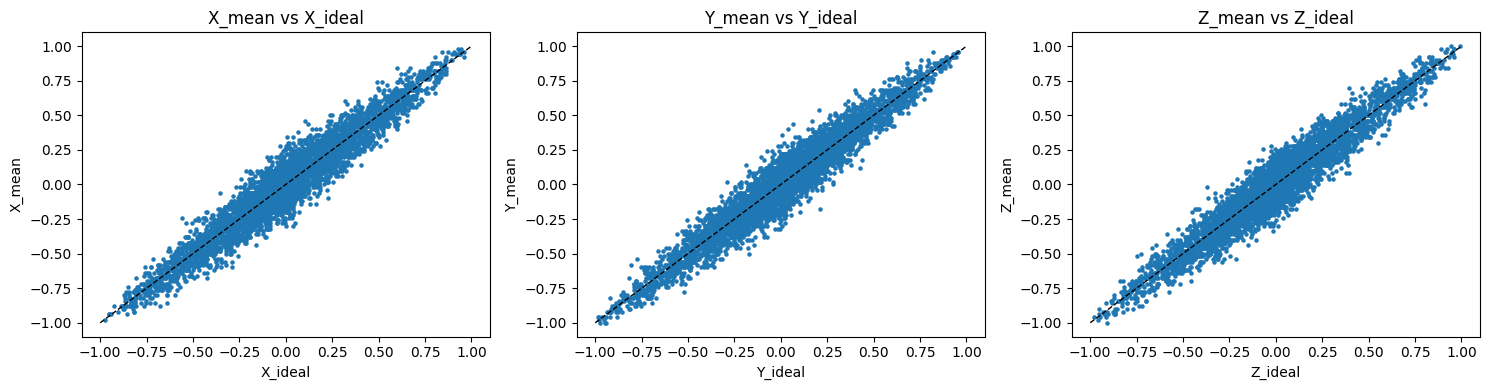

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].scatter(df_ms["X_ideal"], df_ms["X_mean"], s=5)
axes[0].plot([-1, 1], [-1, 1], 'k--', linewidth=1)
axes[0].set_title("X_mean vs X_ideal")
axes[0].set_xlabel("X_ideal")
axes[0].set_ylabel("X_mean")

axes[1].scatter(df_ms["Y_ideal"], df_ms["Y_mean"], s=5)
axes[1].plot([-1, 1], [-1, 1], 'k--', linewidth=1)
axes[1].set_title("Y_mean vs Y_ideal")
axes[1].set_xlabel("Y_ideal")
axes[1].set_ylabel("Y_mean")

axes[2].scatter(df_ms["Z_ideal"], df_ms["Z_mean"], s=5)
axes[2].plot([-1, 1], [-1, 1], 'k--', linewidth=1)
axes[2].set_title("Z_mean vs Z_ideal")
axes[2].set_xlabel("Z_ideal")
axes[2].set_ylabel("Z_mean")

plt.tight_layout()
plt.show()

In [6]:
# Vecteur de Bloch pour l'état estimé
df_ms["rx0"] = df_ms["r0"] * np.sin(df_ms["theta0"]) * np.cos(df_ms["phi0"])
df_ms["ry0"] = df_ms["r0"] * np.sin(df_ms["theta0"]) * np.sin(df_ms["phi0"])
df_ms["rz0"] = df_ms["r0"] * np.cos(df_ms["theta0"])

# Vecteur de Bloch pour l'état idéal 
df_ms["rx_id"] = df_ms["r_ideal"] * np.sin(df_ms["theta_ideal"]) * np.cos(df_ms["phi_ideal"])
df_ms["ry_id"] = df_ms["r_ideal"] * np.sin(df_ms["theta_ideal"]) * np.sin(df_ms["phi_ideal"])
df_ms["rz_id"] = df_ms["r_ideal"] * np.cos(df_ms["theta_ideal"])

# Produit scalaire r0 · r_ideal
dot = (
    df_ms["rx0"] * df_ms["rx_id"]
    + df_ms["ry0"] * df_ms["ry_id"]
    + df_ms["rz0"] * df_ms["rz_id"]
)

r0_sq = df_ms["r0"]**2
r_id_sq = df_ms["r_ideal"]**2

# Terme racine (gérer les arrondis numériques avec clip)
sqrt_term = np.sqrt(
    np.clip(1 - r0_sq, 0, 1) * np.clip(1 - r_id_sq, 0, 1)
)

df_ms["fidelity_mes"] = 0.5 * (1 + dot + sqrt_term)

# Sécurité numé­rique
df_ms["fidelity_mes"] = np.clip(df_ms["fidelity_mes"], 0, 1)

print("Mean measured fidelity:", np.mean(df_ms["fidelity_mes"]))

Mean measured fidelity: 0.9910511818997462


In [7]:
# Compute the angle error of theta
df_ms["theta_mes_error"] = df_ms["theta0"] - df_ms["theta_ideal"]

# Compute the angle error of phi (we must use this formula to ensure the right error as 2pi and 0 are the same)
phi_mes_diff = (df_ms["phi0"] - df_ms["phi_ideal"] + np.pi) % (2.0 * np.pi) - np.pi
df_ms["phi_mes_error"] = phi_mes_diff

df_ms.head()

,X_mean,Y_mean,Z_mean,theta_ideal,phi_ideal,r_ideal,cos_phi_ideal,sin_phi_ideal,cos_theta_ideal,sin_theta_ideal,...,phi0,rx0,ry0,rz0,rx_id,ry_id,rz_id,fidelity_mes,theta_mes_error,phi_mes_error
0,0.00,-0.92,-0.28,1.824427,4.599254,0.950714,-0.112894,-0.993607,-0.250920,0.968008,...,4.712389,-1.690013e-16,-0.92,-0.28,-0.103896,-0.914415,-0.238553,0.996543,0.041811,0.113135
1,0.72,-0.18,0.18,1.292352,6.131459,0.726091,0.988512,-0.151144,0.274860,0.961484,...,6.038207,7.200000e-01,-0.18,0.18,0.690105,-0.105518,0.199573,0.997853,0.040503,-0.093253
2,-0.12,-0.18,-0.08,2.198555,3.163064,0.364270,-0.999769,-0.021470,-0.587333,0.809346,...,4.124386,-1.200000e-01,-0.18,-0.08,-0.294752,-0.006330,-0.213948,0.979904,-0.273555,0.961322
3,-0.10,0.40,-0.30,1.813796,1.684294,0.590295,-0.113254,0.993566,-0.240615,0.970621,...,1.815775,-1.000000e-01,0.40,-0.30,-0.064889,0.569266,-0.142034,0.985587,0.386015,0.131481
4,-0.16,-0.54,-0.58,2.308719,4.358534,0.794810,-0.346517,-0.938044,-0.672752,0.739868,...,4.424334,-1.600000e-01,-0.54,-0.58,-0.203770,-0.551620,-0.534710,0.998891,0.062166,0.065800


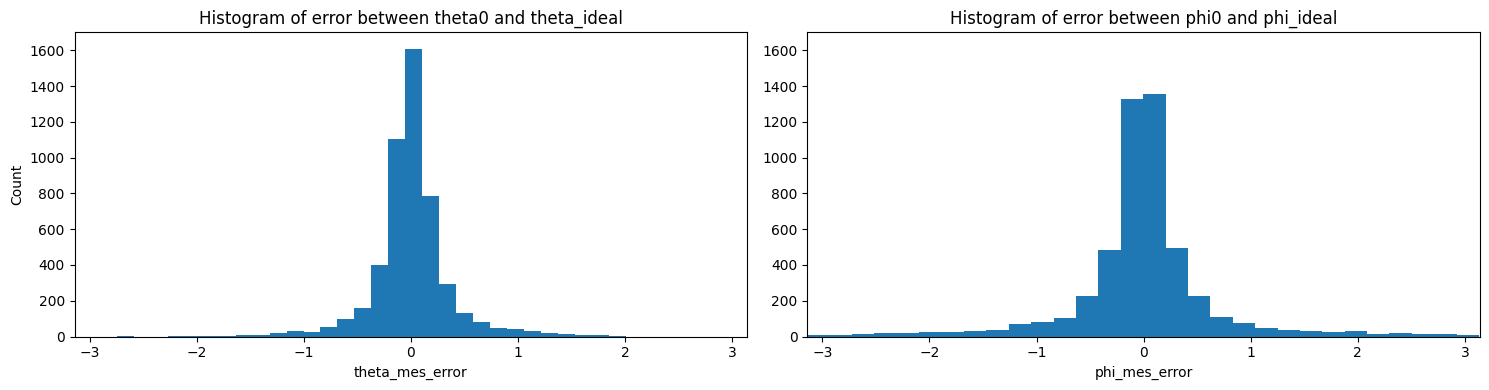

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

axes[0].hist(df_ms["theta_mes_error"], bins=30)
axes[0].set_title("Histogram of error between theta0 and theta_ideal")
axes[0].set_xlabel("theta_mes_error")
axes[0].set_ylabel("Count")
axes[0].set_xlim(-np.pi, np.pi)
axes[0].set_ylim(0, 1700)

axes[1].hist(df_ms["phi_mes_error"], bins=30)
axes[1].set_title("Histogram of error between phi0 and phi_ideal")
axes[1].set_xlabel("phi_mes_error")
axes[1].set_xlim(-np.pi, np.pi)
axes[1].set_ylim(0, 1700)

plt.tight_layout()
plt.show()

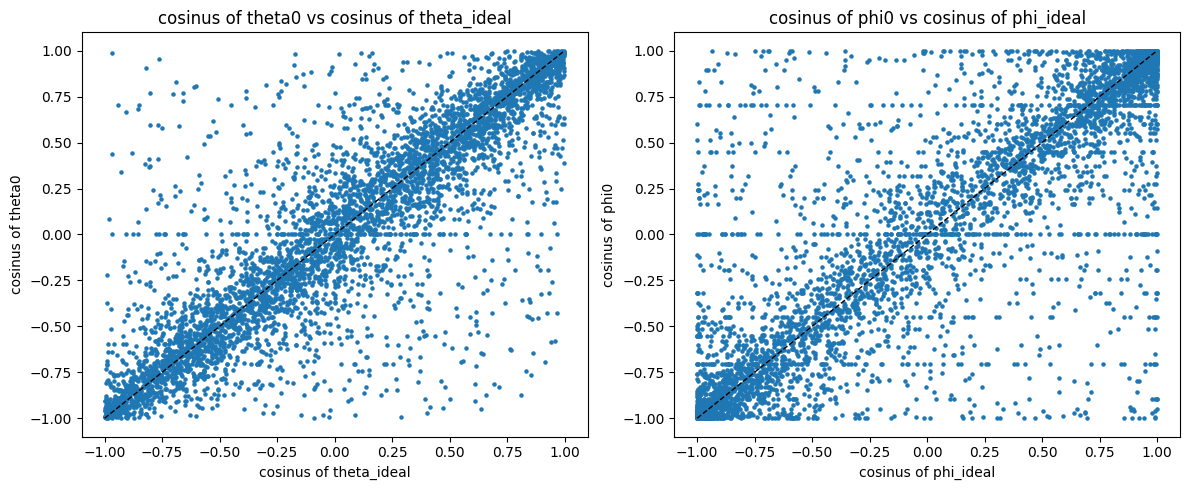

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# theta
axes[0].scatter(np.cos(df_ms["theta_ideal"]), np.cos(df_ms["theta0"]), s=5)
axes[0].plot([-1, 1], [-1, 1], 'k--', linewidth=1)
axes[0].set_title("cosinus of theta0 vs cosinus of theta_ideal")
axes[0].set_xlabel("cosinus of theta_ideal")
axes[0].set_ylabel("cosinus of theta0")

# phi
axes[1].scatter(df_ms["cos_phi_ideal"], np.cos(df_ms["phi0"]), s=5)
axes[1].plot([-1, 1], [-1, 1], 'k--', linewidth=1)
axes[1].set_title("cosinus of phi0 vs cosinus of phi_ideal")
axes[1].set_xlabel("cosinus of phi_ideal")
axes[1].set_ylabel("cosinus of phi0")

plt.tight_layout()
plt.show()

In [10]:
# Compte le nombre d'états où l'estimation linéaire donnait un rayon > 1
nb_erreurs_physiques = len(df_ms[df_ms['r0'] > 1.0])
print(f"Nombre d'états initialement non-physiques : {nb_erreurs_physiques} sur {len(df_ms)}")

Nombre d'états initialement non-physiques : 0 sur 4997


In [11]:
def neg_log_likelihood_ms(params, row):
    theta, phi, r = params

    # Bloch vector direction
    rx = np.sin(theta) * np.cos(phi)
    ry = np.sin(theta) * np.sin(phi)
    rz = np.cos(theta)

    # Expected Pauli means
    Ex = r * rx
    Ey = r * ry
    Ez = r * rz

    # Theoretical probabilities for + outcome
    Px = 0.5 * (1 + Ex)
    Py = 0.5 * (1 + Ey)
    Pz = 0.5 * (1 + Ez)

    # Clip numerical instabilities (strict MLE domain)
    eps = 1e-12
    Px = np.clip(Px, eps, 1 - eps)
    Py = np.clip(Py, eps, 1 - eps)
    Pz = np.clip(Pz, eps, 1 - eps)

    # Observations
    kx = df_ms.iloc[row]["numberX"]
    ky = df_ms.iloc[row]["numberY"]
    kz = df_ms.iloc[row]["numberZ"]

    # Binomial negative log-likelihood (sans constantes)
    nll  = -( kx * np.log(Px) + (N_SHOTS_ms - kx) * np.log(1 - Px) )
    nll += -( ky * np.log(Py) + (N_SHOTS_ms - ky) * np.log(1 - Py) )
    nll += -( kz * np.log(Pz) + (N_SHOTS_ms - kz) * np.log(1 - Pz) )

    return nll

def mle_row_ms(row):
    # First estimation of theta and phi (based on the mean)
    theta0, phi0, r0 = df_ms.iloc[row]["theta0"], df_ms.iloc[row]["phi0"], df_ms.iloc[row]["r0"]
    
    # Keep theta between 0 and pi and phi between 0 and 2pi
    bounds = [(0.0, np.pi), (-np.pi, 3.0 * np.pi), (0.001, 1.0)]
    
    # Minimize the Negative Log Likelihood
    res = minimize(
        fun=neg_log_likelihood_ms,
        x0=np.array([theta0, phi0, r0], dtype=float),
        args=(row,),
        bounds=bounds,
        method="L-BFGS-B"
    )
    
    theta_hat, phi_hat, r_hat = res.x
    # In case phi = 2pi we bring it back to 0
    phi_hat = phi_hat % (2.0 * np.pi)
    
    return theta_hat, phi_hat, r_hat

In [12]:
theta_hats_ms = []
phi_hats_ms = []
r_hats_ms = []

# Apply the algorithm to every state. It takes around 1 minute to run
for i in range(len(df_ms)):
    theta_hat, phi_hat, r_hat = mle_row_ms(i)
    theta_hats_ms.append(theta_hat)
    phi_hats_ms.append(phi_hat)
    r_hats_ms.append(r_hat)

In [14]:
df_ms["theta_hat"] = theta_hats_ms
df_ms["phi_hat"] = phi_hats_ms  
df_ms["r_hat"] = r_hats_ms

df_ms[["r_ideal", "r0", "r_hat", "phi_ideal", "phi0", "phi_hat", "theta_ideal", "theta0", "theta_hat"]].head()

,r_ideal,r0,r_hat,phi_ideal,phi0,phi_hat,theta_ideal,theta0,theta_hat
0,0.950714,0.961665,0.961665,4.599254,4.712389,4.712389,1.824427,1.866237,1.866237
1,0.726091,0.763675,0.763675,6.131459,6.038207,6.038207,1.292352,1.332855,1.332855
2,0.364270,0.230651,0.230651,3.163064,4.124386,4.124386,2.198555,1.925000,1.925000
3,0.590295,0.509902,0.509902,1.684294,1.815775,1.815775,1.813796,2.199811,2.199811
4,0.794810,0.808455,0.808455,4.358534,4.424334,4.424334,2.308719,2.370884,2.370884


In [15]:
# Vecteur de Bloch pour l'état estimé
df_ms["rx_hat"] = df_ms["r_hat"] * np.sin(df_ms["theta_hat"]) * np.cos(df_ms["phi_hat"])
df_ms["ry_hat"] = df_ms["r_hat"] * np.sin(df_ms["theta_hat"]) * np.sin(df_ms["phi_hat"])
df_ms["rz_hat"] = df_ms["r_hat"] * np.cos(df_ms["theta_hat"])

# Produit scalaire r0 · r_ideal
dot_mle = (
    df_ms["rx_hat"] * df_ms["rx_id"]
    + df_ms["ry_hat"] * df_ms["ry_id"]
    + df_ms["rz_hat"] * df_ms["rz_id"]
)

r0_sq_mle = df_ms["r_hat"]**2
r_id_sq_mle = df_ms["r_ideal"]**2

# Terme racine (gérer les arrondis numériques avec clip)
sqrt_term_mle = np.sqrt(
    np.clip(1 - r0_sq_mle, 0, 1) * np.clip(1 - r_id_sq_mle, 0, 1)
)

df_ms["fidelity"] = 0.5 * (1 + dot_mle + sqrt_term_mle)

# Sécurité numé­rique
df_ms["fidelity"] = np.clip(df_ms["fidelity"], 0, 1)

print("Mean fidelity:", np.mean(df_ms["fidelity"]))

Mean fidelity: 0.9910725720182599


In [16]:
print(np.acos(np.sqrt(np.mean(df_ms["fidelity"])))*180/np.pi)
print(np.acos(np.sqrt(np.mean(df_ms["fidelity_mes"])))*180/np.pi)



5.421683041630925
5.428193811653131


In [19]:
!jupyter nbconvert --to html --output notebook_export.html mixed_State_mle.ipynb

[NbConvertApp] Converting notebook mixed_State_mle.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 735840 bytes to notebook_export.html
